In [11]:
import pandas as pd
df_ = pd.read_csv(r'C:\Users\PC\source\repos\IPT_Lab6_233985\IPT_Lab6_233985\bin\Release\Output_SA.csv', sep=';')
df_kmp = pd.read_csv(r'C:\Users\PC\source\repos\IPT_Lab2_233985\IPT_Lab2_233985\bin\Release\Output_KMP.csv', sep=';')
df_naive = pd.read_csv(r'C:\Users\PC\source\repos\IPT_Lab2_233985\IPT_Lab2_233985\bin\Release\Output_Naive.csv', sep=';')
df_rk = pd.read_csv(r'C:\Users\PC\source\repos\IPT_Lab2_233985\IPT_Lab2_233985\bin\Release\Output_RK.csv', sep=';')
df_list = [df_, df_kmp, df_naive, df_rk]

file_sizes = ["1", "2", "3", "4", "5", "10"]
labels = ["SA", "KMP", "Naive", "R-K"]
colors = ["red", "green", "blue", "orange"]
m = [8, 16, 32, 64]

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_processed = []
for df in df_list:
    df["file_size"] = df["file_size"].str.replace("MB", "")
    df["file_size"] = df["file_size"].astype(int)
    df["time(ms)"] = df["time(ms)"].astype(str).str.replace(",",".")
    df["time(ms)"] = df["time(ms)"].astype(float)
    df_processed.append(df)


[]

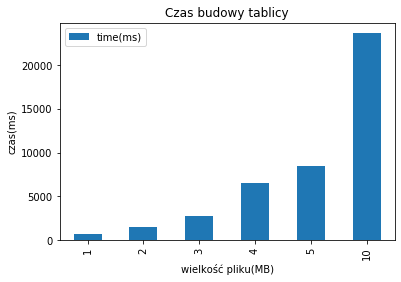

In [3]:
ax = df_processed[0][df_processed[0]["m/mode"]=="build"].plot.bar(x='file_size', y='time(ms)', title='Czas budowy tablicy')
ax.set_xlabel("wielkość pliku(MB)")
ax.set_ylabel("czas(ms)")
ax.plot()

In [4]:
df_processed[0] = df_processed[0][df_processed[0]["m/mode"] != "build"]
df_processed[0]["m/mode"] = df_processed[0]["m/mode"].astype(int)

C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


4


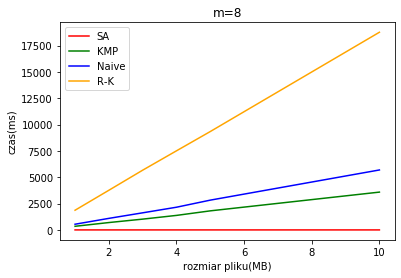

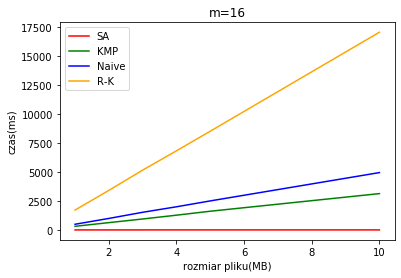

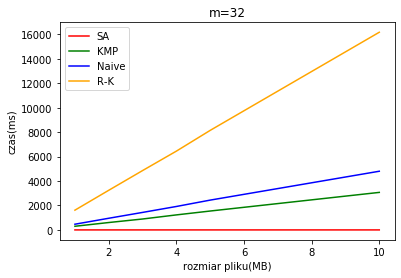

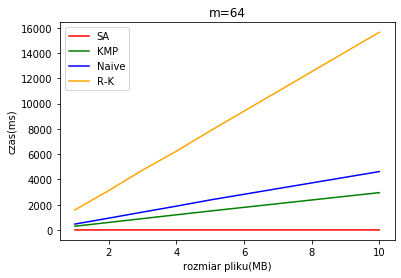

In [32]:
import matplotlib.pyplot as plt

print(len(df_processed))

for m_size in m:
    fig = plt.axes()
    #df_processed[0][df_processed[0]["m/mode"]==m_size].plot(ax = fig, title="m=" + str(m_size), x="file_size", y="time(ms)")
    
    
    for i in range(0,4):
        df_processed[i][df_processed[i]["m/mode"]==m_size].plot(ax = fig, color={colors[i]}, label = labels[i], title="m="+str(m_size), x="file_size", y="time(ms)")
    fig.set_xlabel("rozmiar pliku(MB)")
    fig.set_ylabel("czas(ms)")
    fig.plot()
    plt.show()

[]

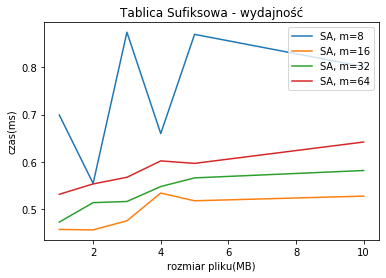

In [35]:
fig = plt.axes()
fig.set_title("Tablica Sufiksowa - wydajność")
for m_size in m:
    
    df_processed[0][df_processed[0]["m/mode"]==m_size].plot(ax = fig, label="SA, m=" + str(m_size), x="file_size", y="time(ms)")
    
fig.set_xlabel("rozmiar pliku(MB)")
fig.set_ylabel("czas(ms)")
fig.plot()